# Interactive Shack-Hartmann Wavefront Sensor

In [1]:
import numpy as np
import ceo
%pylab inline
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def shackHartmann(wavelength="V",pupil='square',nLenslet=1,n=6,DFT_osf=2,N_PX_IMAGE=6,BIN_IMAGE=1,nGS=1):
    #nLenslet = 10
    D = 8.0
    pitch = D/nLenslet
    #n = 6
    nPx = n*nLenslet + 1
    #nGS = 1
    zen = np.random.uniform(-1,1,nGS)*5*math.pi/180/60
    azi = np.random.uniform(0,2*math.pi,nGS)
    gs = ceo.Source(wavelength,zenith=zen,azimuth=azi,height=float("inf"),resolution=(nPx,nPx))
    if pupil=='square':
        tel = ceo.Mask(nPx,D)
    if pupil=='disc':
        tel = ceo.Telescope(nPx,D)
    if pupil=='GMT':
        D = 25.5
        tel = ceo.GMT(nPx,D)
    gs.masked(tel)
    wfs = ceo.ShackHartmann(nLenslet, n, pitch,DFT_osf=DFT_osf,N_PX_IMAGE=N_PX_IMAGE,BIN_IMAGE=BIN_IMAGE,N_GS = nGS)
    #wfs.calibrate(gs,0.5)
    wfs.analyze(gs)
    figure(figsize=(nGS*8,8))
    frame = wfs.frame.host().transpose()
    l = frame.shape[0]/2.0
    imshow(frame,interpolation='none',extent=(-l,l,-l,l))
    grid()
    colorbar()


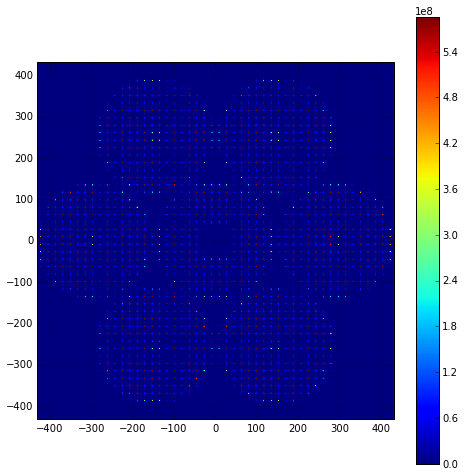

In [3]:
i = interact(shackHartmann,wavelength=["V","R","I","J","K"],pupil=['square','disc','GMT'],
             nLenslet=(1,100),n=(2,64),DFT_osf=(2,6),N_PX_IMAGE=(2,64),BIN_IMAGE=(1,4),nGS=(1,6))